<a href="https://colab.research.google.com/github/tarek2004-l/Projects/blob/main/Air_Quality_Clustering_Using_GIS_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('data_date.csv')

In [3]:
print(df.head())

         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19299 entries, 0 to 19298
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       19299 non-null  object
 1   Country    19299 non-null  object
 2   Status     19299 non-null  object
 3   AQI Value  19299 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 603.2+ KB
None


In [5]:
print(df.isnull().sum())

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


In [12]:
df['date'] = pd.to_datetime(df['Date'])
print(df.describe())
print(df['Country'].value_counts())


                                Date     AQI Value  \
count                          19299  19299.000000   
mean   2023-06-28 15:09:20.174102272     63.537955   
min              2022-07-21 00:00:00      1.000000   
25%              2022-08-19 00:00:00     29.000000   
50%              2022-09-21 00:00:00     53.000000   
75%              2024-08-15 00:00:00     83.000000   
max              2025-05-22 00:00:00    963.000000   
std                              NaN     50.484237   

                                date  
count                          19299  
mean   2023-06-28 15:09:20.174102272  
min              2022-07-21 00:00:00  
25%              2022-08-19 00:00:00  
50%              2022-09-21 00:00:00  
75%              2024-08-15 00:00:00  
max              2025-05-22 00:00:00  
std                              NaN  
Country
Argentina                   145
Andorra                     145
Armenia                     145
Belgium                     145
Austria                   

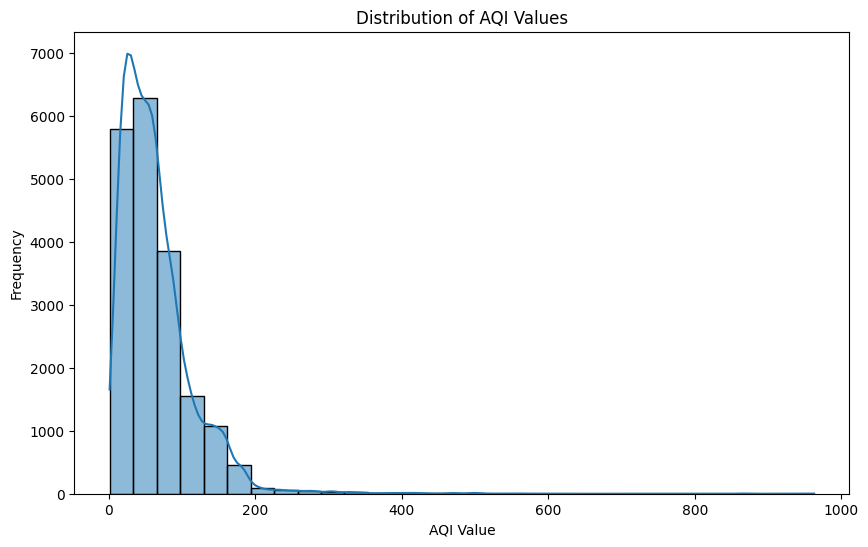

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI Value'], bins=30, kde=True)
plt.title("Distribution of AQI Values")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()

In [16]:
avg_aqi_country = df.groupby("Country", as_index=False)["AQI Value"].mean()


In [19]:
fig = px.choropleth(
    avg_aqi_country,
    locations="Country",
    locationmode="country names",
    color="AQI Value",
    color_continuous_scale="RdYlGn_r",  # Red = bad air, Green = good
    title="Average AQI by Country"
)
fig.show()

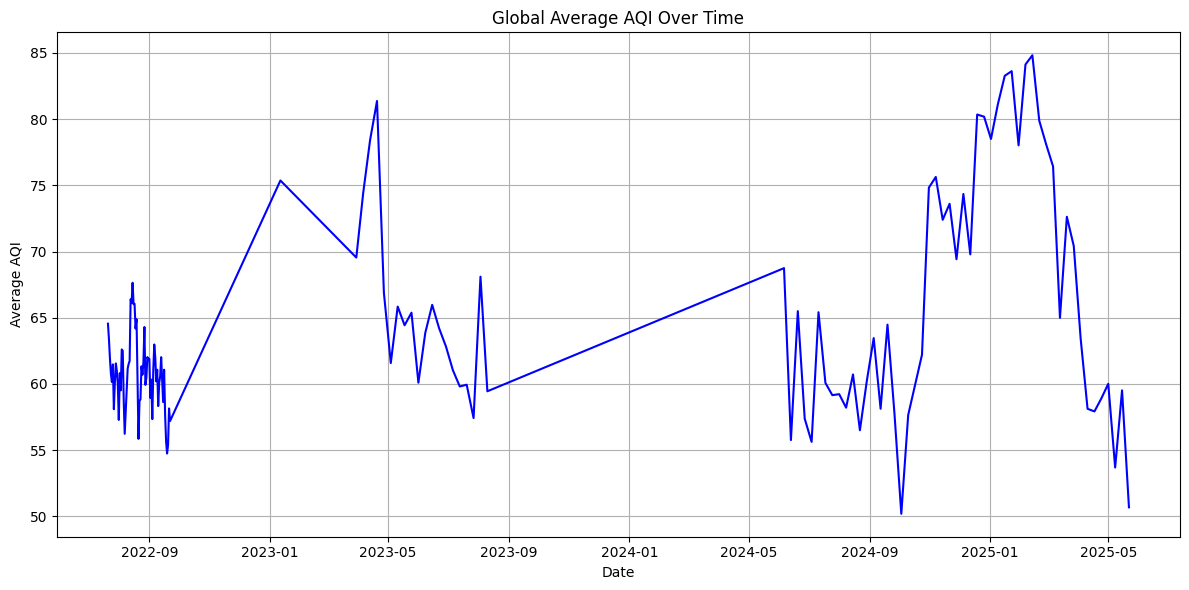

In [20]:
global_trend = df.groupby("Date")["AQI Value"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_trend["Date"], global_trend["AQI Value"], color='blue')
plt.title("Global Average AQI Over Time")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()


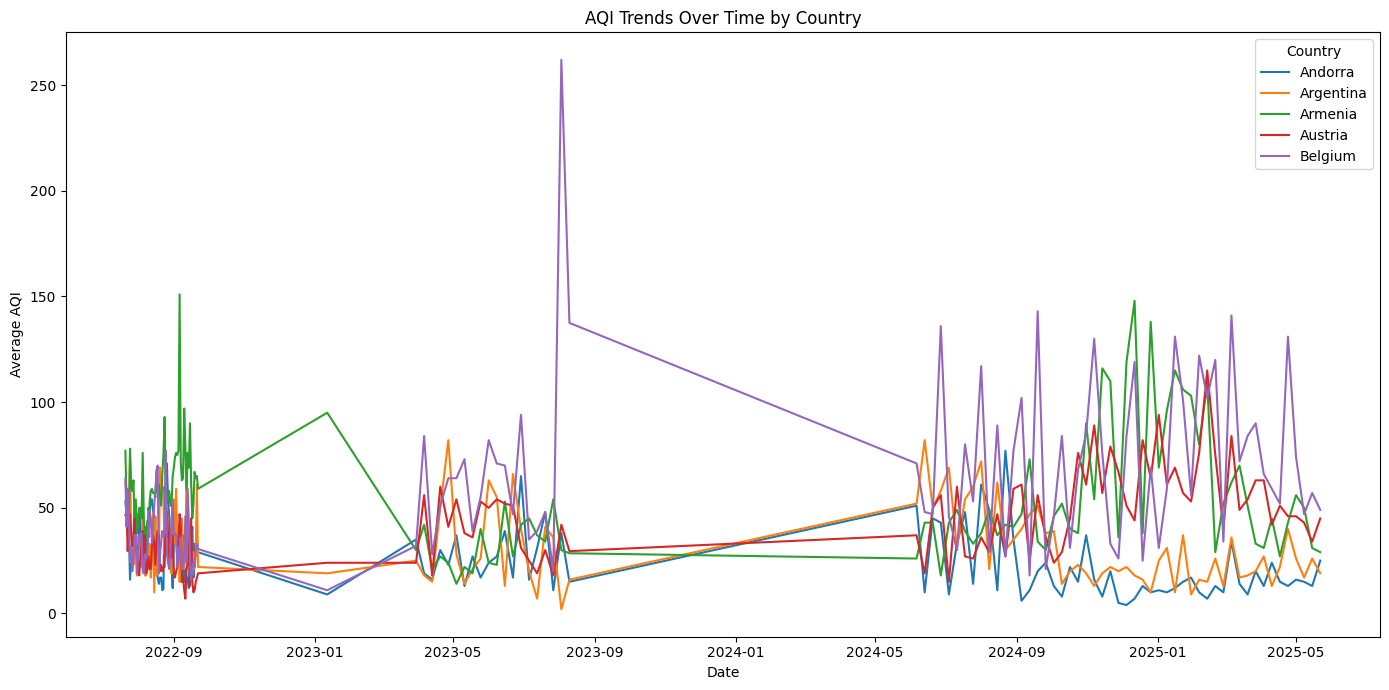

In [21]:
top_countries = df['Country'].value_counts().nlargest(5).index
top_df = df[df['Country'].isin(top_countries)]
country_trend = top_df.groupby(["Date", "Country"])["AQI Value"].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=country_trend, x="Date", y="AQI Value", hue="Country")
plt.title("AQI Trends Over Time by Country")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


In [24]:
country_avg = df.groupby("Country")["AQI Value"].mean().reset_index()
country_avg.columns = ["Country", "avg_aqi"]
scaler = StandardScaler()
country_avg["scaled_aqi"] = scaler.fit_transform(country_avg[["avg_aqi"]])

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0)
country_avg["cluster"] = kmeans.fit_predict(country_avg[["scaled_aqi"]])

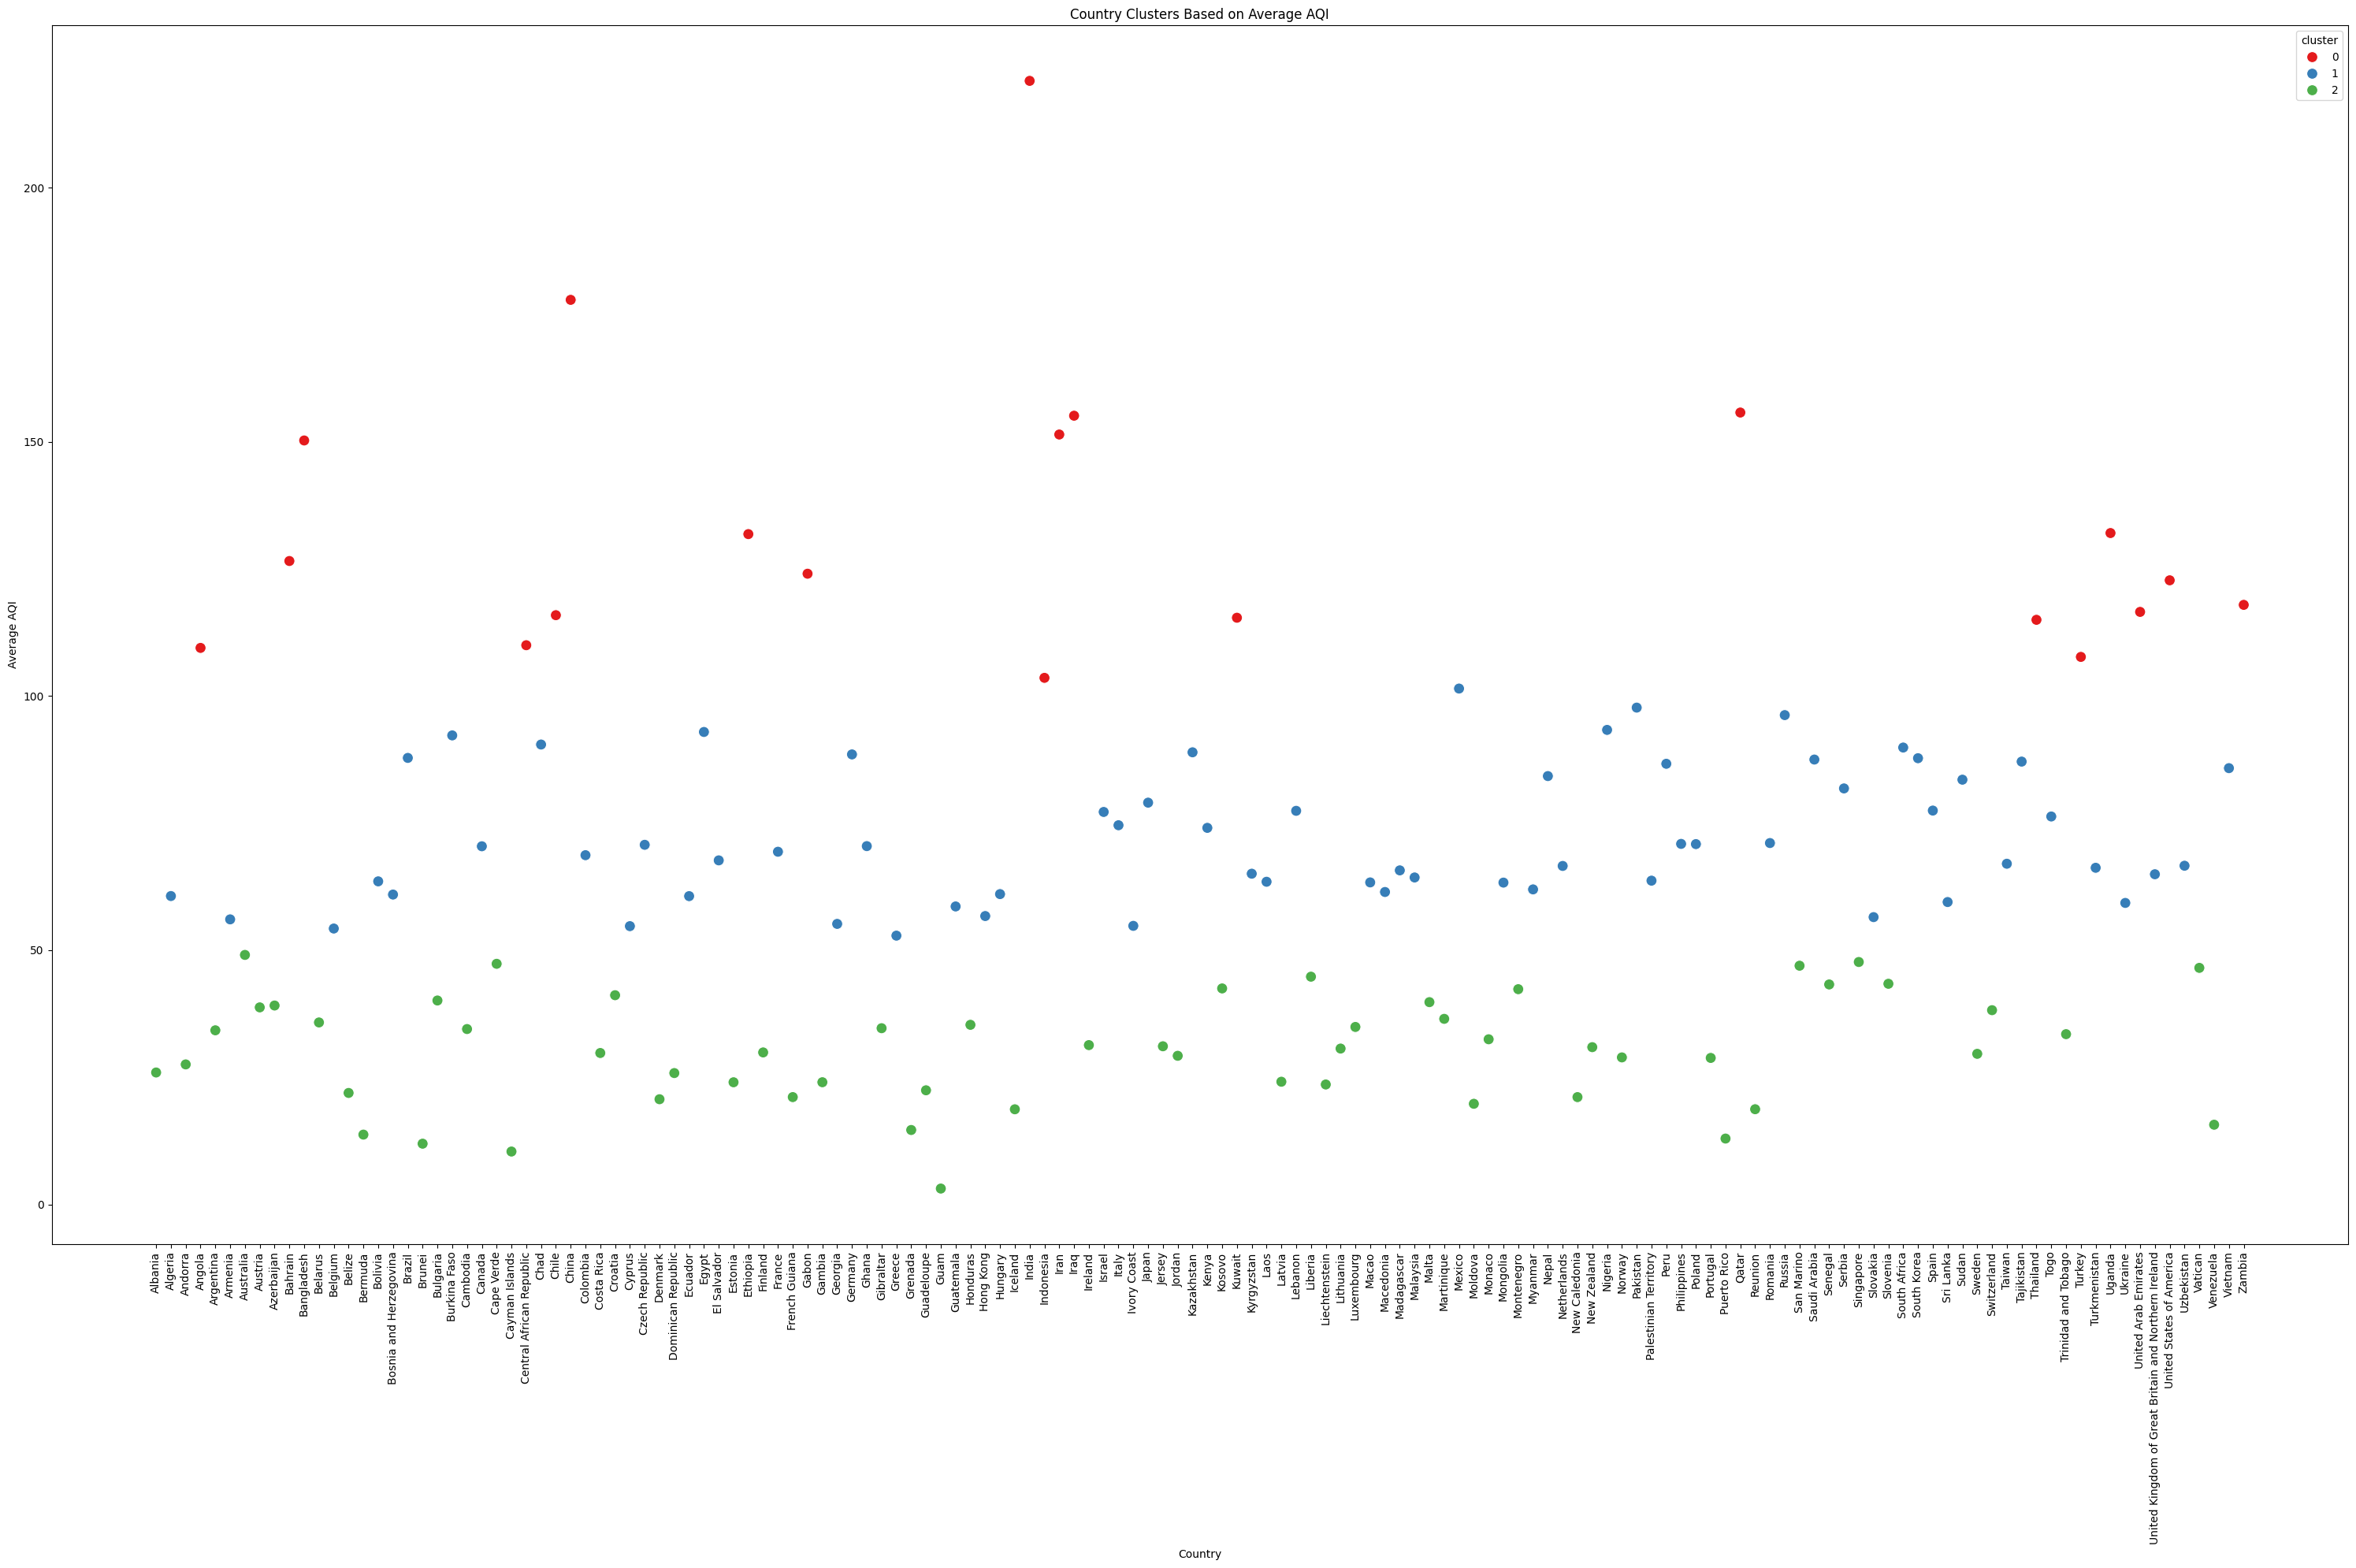

In [35]:
plt.figure(figsize=(30, 20))
sns.scatterplot(data=country_avg, x="Country", y="avg_aqi", hue="cluster", palette="Set1", s=100)
plt.xticks(rotation=90)
plt.title("Country Clusters Based on Average AQI")
plt.xlabel("Country")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()


In [36]:
for i in range(3):
    print(f"\nCluster {i}:")
    print(country_avg[country_avg["cluster"] == i]["Country"].tolist())


Cluster 0:
['Angola', 'Bahrain', 'Bangladesh', 'Central African Republic', 'Chile', 'China', 'Ethiopia', 'Gabon', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait', 'Qatar', 'Thailand', 'Turkey', 'Uganda', 'United Arab Emirates', 'United States of America', 'Zambia']

Cluster 1:
['Algeria', 'Armenia', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Burkina Faso', 'Canada', 'Chad', 'Colombia', 'Cyprus', 'Czech Republic', 'Ecuador', 'Egypt', 'El Salvador', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macao', 'Macedonia', 'Madagascar', 'Malaysia', 'Mexico', 'Mongolia', 'Myanmar', 'Nepal', 'Netherlands', 'Nigeria', 'Pakistan', 'Palestinian Territory', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Slovakia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Taiwan', 'Tajikistan', 'Togo', 'Turkm